In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from PIL import Image

IMAGE_DIR = "../fashion_images/dataset_clean"

images = []
image_paths = []

# iterate to call images data
for root, _, files in os.walk(IMAGE_DIR):
    for filename in files:
        if filename.lower().endswith(".jpg"):
            path = os.path.join(root, filename)
            image = Image.open(path).convert("RGB")
            images.append(image)
            image_paths.append(path)
    
print(f"Loaded {len(images)} JPG Images")

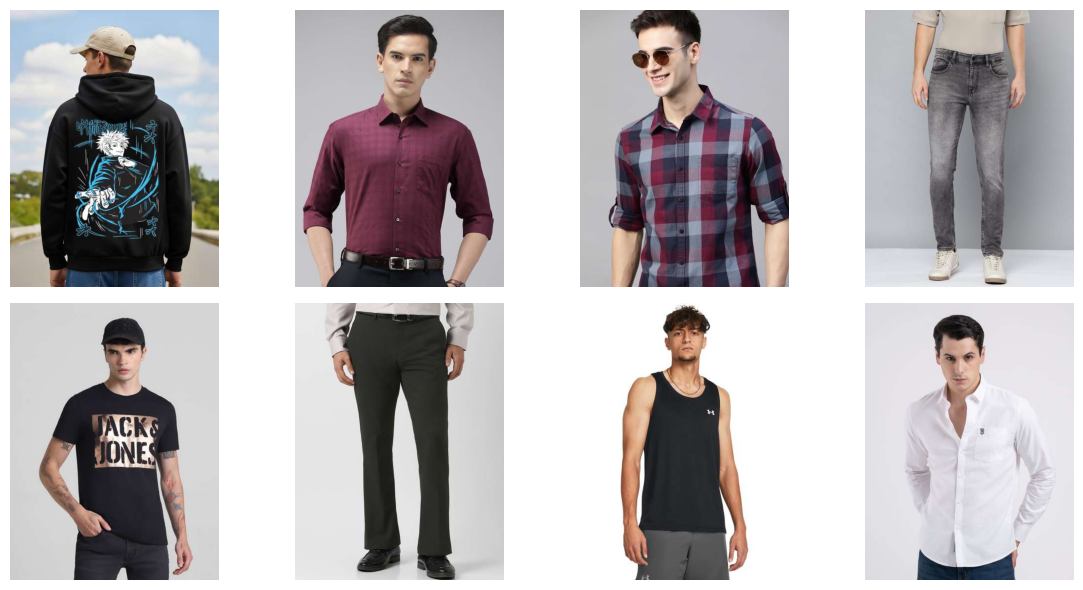

In [ ]:
# Show random images

import random
import matplotlib.pyplot as plt

def show_random_images(images, n=8, cols=4, figsize=(12, 6)):
    n = min(n, len(images))
    selected = random.sample(images, n)

    rows = (n + cols - 1) // cols
    plt.figure(figsize=figsize)

    for i, img in enumerate(selected):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Usage
show_random_images(images, n=8)

# Tensorflow deep learning model
# Purpose project:
### **Extracting images features to model which are integrated to business problem**
### * **enabling robust modeling of user preferences.**
### * **recommendation algorithms have progressively evolved from linear models to deep neural networks**
### * **multimodal deep learning framework that integrates visual, textual, and price features for business insight**
### * **Try to match outfit features top and bottom wearing (Optional task)**

In [ ]:
# Load dataset and metadata
def load_file(parquet_path):
    df = pd.read_parquet(parquet_path)
    return df

pd.set_option('display.max_colwidth', None)
df = load_file("../data/matched_fashion_dataset.parquet")

# Features data matching

In [ ]:
df

,item_id,category,subcategory,sleeve_type,season,fabric,occasion,formality_level,size_range,brand,view_count,click_count,purchase_count,length_cm,price,stocks,item_id_str,idx_within_subcat,image_path
0,TNC_000001,bottoms,men_cargos,long,winter,polyester,casual,high,S,Tommy Hilfiger,93,192,4,97,262476,35,TNC_000001,0,../fashion_images/dataset_clean/men_cargos/img_0969.jpg
1,TNC_000002,tops,formal_shirts,long,winter,linen,party,medium,S,HnM,2941,84,5,77,266987,182,TNC_000002,0,../fashion_images/dataset_clean/formal_shirts/img_0969.jpg
2,TNC_000003,tops,formal_shirts,long,winter,denim,party,high,XL,HnM,401,434,35,71,286065,32,TNC_000003,1,../fashion_images/dataset_clean/formal_shirts/img_0955.jpg
3,TNC_000004,tops,printed_tshirts,short,all-season,linen,office,low,XXL,Tommy Hilfiger,318,85,101,70,153376,149,TNC_000004,0,../fashion_images/dataset_clean/printed_tshirts/img_0969.jpg
4,TNC_000005,tops,formal_shirts,long,all-season,polyester,casual,low,L,ZARA,857,153,67,69,323155,43,TNC_000005,2,../fashion_images/dataset_clean/formal_shirts/img_0799.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099995,TNC_1099996,tops,solid_tshirts,short,summer,polyester,party,medium,M,HnM,2924,183,2,73,140786,163,TNC_1099996,109772,../fashion_images/dataset_clean/solid_tshirts/img_0492.jpg
1099996,TNC_1099997,bottoms,formal_pants,long,summer,denim,party,high,XXL,Polo,2362,94,32,95,353863,198,TNC_1099997,183895,../fashion_images/dataset_clean/formal_pants/img_0123.jpg
1099997,TNC_1099998,bottoms,men_cargos,long,winter,fleece,casual,low,M,Adidas,617,147,39,97,299627,78,TNC_1099998,183289,../fashion_images/dataset_clean/men_cargos/img_0415.jpg
1099998,TNC_1099999,tops,solid_tshirts,short,summer,cotton,office,low,XXL,Tommy Hilfiger,326,0,25,71,153123,172,TNC_1099999,109773,../fashion_images/dataset_clean/solid_tshirts/img_0486.jpg


# Command
### Split data into numeric_cols and categorical_cols
### Normalize Numeric Features
### Encode Categorical Features
### Image Loading Pipeline (TF-Native & Scalable)
### Build tf.data.Dataset (MANDATORY)
    Purpose
    • Streaming
    • Shuffling
    • GPU utilization
    • Reliability

### Define Image Encoder (tensorflow.keras, ResNet50)
### Define Metadata Encoder (MLP + Embeddings)
### Joint Embedding Head (CORE MODEL)
### Final Model (Embedding Model)
### Loss Function (WHY THIS WORKS) -> Use self-supervised similarity.
### Train model
### Generate Embeddings (predict use model toward on data)

## Split data

In [ ]:
import tensorflow as tf

NUMERIC_COLS = [
    "price",
    "length_cm",
    "view_count",
    "click_count",
    "purchase_count",
]

CATEGORICAL_COLS = [
    "category",
    "subcategory",
    "brand",
    "sleeve_type",
]

## Normalize Numeric Features

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Normalize numeric columns using RobustScaler for deep learning
scaler = StandardScaler()
X_num = scaler.fit_transform(df[NUMERIC_COLS].fillna(0))

print("Numeric features shape:", X_num.shape)

Numeric features shape: (1100000, 5)


# Data encoding for categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
X_cat = {}

for col in CATEGORICAL_COLS:
    """Encoding for categorial features"""
    le = LabelEncoder()
    X_cat[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

X_cat = pd.DataFrame(X_cat)

In [ ]:
X_cat

,category,subcategory,brand,sleeve_type
0,0,4,4,0
1,1,2,1,0
2,1,2,1,0
3,1,6,4,1
4,1,2,5,0
...,...,...,...,...
1099995,1,7,1,1
1099996,0,1,3,0
1099997,0,4,0,0
1099998,1,7,4,1


## Image Loading Pipeline (TF-Native & Scalable)

In [ ]:
def load_image(path):
    """Load and preprocess image"""
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = img / 255.0  # Normalize to [0, 1]
    return img

## Create assumtion based High Performer vs Low Performer

In [ ]:
# Top 30% engagement score threshold
engagement_score = (
    df['purchase_count'] * 10 +
    df['click_count'] * 2 +
    df['view_count'] * 1
)

threshold = engagement_score.quantile(0.7)
y_target = (engagement_score >= threshold).astype(float).values
print(f"Target distribution - Positive: {y_target.mean():.2%}, Negative: {(1-y_target).mean():.2%}")

Target distribution - Positive: 30.03%, Negative: 69.97%


## Build tf.data.Dataset

In [ ]:
# FIXED: Create function to build tf.data.Dataset
def build_dataset(df, X_cat, X_num, y_target, batch_size=256):
    """Build tf.data.Dataset for getting data into Tensorflow model"""
    ds = tf.data.Dataset.from_tensor_slices({
        "image_path": df["image_path"].values,
        "numeric": X_num,
        "category": X_cat["category"].values,
        "subcategory": X_cat["subcategory"].values,
        "brand": X_cat["brand"].values,
        "sleeve_type": X_cat["sleeve_type"].values,
        "target": y_target
    })
    ds = ds.map(lambda x: (
        {
            "image": load_image(x["image_path"]),
            "numeric": x["numeric"],
            "category": x["category"],
            "subcategory": x["subcategory"],
            "brand": x["brand"],
            "sleeve_type": x["sleeve_type"],
        },
        x["target"]
    ), num_parallel_calls=tf.data.AUTOTUNE)
    return ds.shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)  # FIXED: Changed batch(batch_size=batch_size) to batch(batch_size)

## Define Image Encoder (CNN Backbone)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model

# Clear any previous models
tf.keras.backend.clear_session()

image_input = layers.Input(shape=(224, 224, 3), name="image")
base_cnn = ResNet50(weights="imagenet", include_top=False, pooling="avg", input_tensor=image_input)
base_cnn.trainable = False # Start frozen

image_emb = base_cnn(image_input)
image_emb = layers.Dense(256, activation="relu")(image_emb)

## Define Metadata Encoder (MLP + Embeddings)

In [ ]:
num_input = layers.Input(shape=(len(NUMERIC_COLS),), name="numeric")
num_emb = layers.Dense(64, activation="relu")(num_input)

def cat_emb(name, vocab_size, dim=16):
    inp = layers.Input(shape=(1, ), name=name)
    emb = layers.Embedding(input_dim=vocab_size, output_dim=dim)(inp)
    return inp, layers.Flatten()(emb)

cat_inputs = []
cat_embeddings = []

for col in CATEGORICAL_COLS:
    inp, emb = cat_emb(col, len(encoders[col].classes_))
    cat_inputs.append(inp)
    cat_embeddings.append(emb)

## Final Model (Embedding Model)

In [ ]:
# Joint embedding
embedding = layers.Concatenate()([image_emb, num_emb] + cat_embeddings)

output = layers.Dense(1, activation="sigmoid", name='recommended_score')(embedding)

# Build model with output layer
model = tf.keras.Model(
    inputs=[image_input, num_input] + cat_inputs,
    outputs=output
)

# Verify model summary
for inp in model.inputs:
    print(f" {inp.name}: {inp.shape}")

 image: (None, 224, 224, 3)
 numeric: (None, 5)
 category: (None, 1)
 subcategory: (None, 1)
 brand: (None, 1)
 sleeve_type: (None, 1)


## Loss Function (WHY THIS WORKS)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
   optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4),
   loss="binary_crossentropy", # Try loss = "binary_crossentropy" later if we want to checklist fashion attributes
   metrics=["accuracy", "AUC"]
)

# Create EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1
)

# Train model
train_ds = build_dataset(df, X_cat, X_num, y_target)

model.fit(train_ds,
          epochs=7,
          steps_per_epoch=500, # Step per 1 epoch is gaining 500 steps -> if epoch = 7, total steps = 3500
          callbacks=[early_stopping],
          verbose=1
         )

# After training, create embedding extractor model
embedding_model = tf.keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer('concatenate').output # Get the concatenated embedding layer output
)

print("Model trained and embedding extractor created.")

Epoch 1/100
